In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pylab as pl
from sklearn.datasets import load_iris

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/helen/Airbnb Project'

In [4]:
listings_23 = pd.read_csv(os.path.join(path, '01 Data','Prepared Data', 'June 2023', 'listings_23_clean_no_outliers.csv'), index_col = False)

In [5]:
listings_24 = pd.read_csv(os.path.join(path, '01 Data','Prepared Data', 'March 2024', 'listings_24_clean_no_outliers.csv'), index_col = False)

## Pre-processing

In [6]:
#Removing categorical columns

listings_23_no_cat = listings_23[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']]

In [7]:
listings_24_no_cat = listings_24[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']]

In [8]:
#Scaling data
z_score_scaler = StandardScaler()

In [9]:
listings_23_scaled = z_score_scaler.fit_transform(listings_23_no_cat)

In [10]:
listings_24_scaled = z_score_scaler.fit_transform(listings_24_no_cat)

In [11]:
df = pd.DataFrame(data=listings_23_scaled)

In [12]:
column_names = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']

In [13]:
listings_23_scaled = pd.DataFrame(data=listings_23_scaled, columns=column_names)

In [14]:
df_2 = pd.DataFrame(data=listings_24_scaled)

In [15]:
listings_24_scaled = pd.DataFrame(data=listings_24_scaled, columns=column_names)

## Elbow technique

In [16]:
#Defining the range of potential clusters in the data.
num_cl_23 = range(1, 10) 

In [17]:
#Defining k-means clusters in the range assigned above.
kmeans_23 = [KMeans(n_clusters=i) for i in num_cl_23]

In [18]:
score_23 = [kmeans_23[i].fit(listings_23_scaled).score(listings_23_scaled) for i in range(len(kmeans_23))]

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

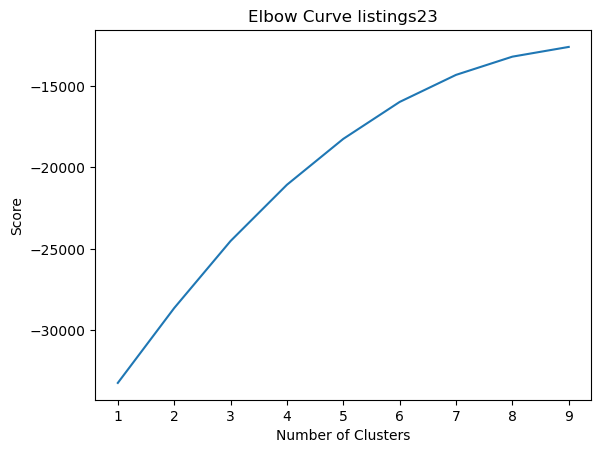

In [19]:
#Plotting the elbow curve using PyLab.

pl.plot(num_cl_23,score_23)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve listings23')
pl.show()

In [20]:
#Defining the range of potential clusters in the data.
num_cl_24 = range(1, 10) 

In [21]:
#Defining k-means clusters in the range assigned above.
kmeans_24 = [KMeans(n_clusters=i) for i in num_cl_24]

In [23]:
score_24 = [kmeans_24[i].fit(listings_24_scaled).score(listings_24_scaled) for i in range(len(kmeans_24))]

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

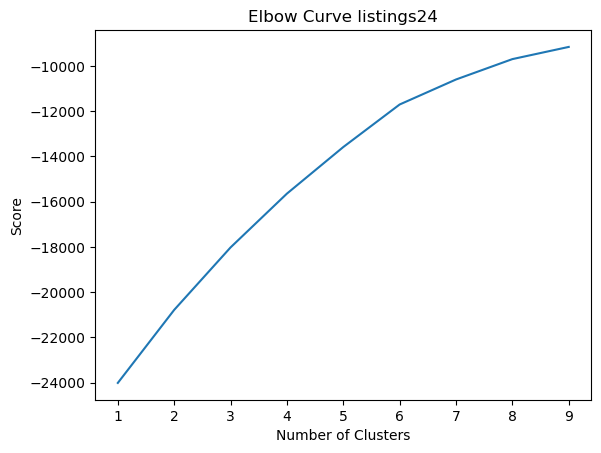

In [24]:
#Plotting the elbow curve using PyLab.

pl.plot(num_cl_24,score_24)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve listings24')
pl.show()

Initially, 6 was used as the Kmeans for both listings_23 and listings_24 as the line appears in both diagrams to level out at this point. However, upon testing, a Kmeans of 4 proved to be more insightful and resulted in clearer clustering. 

## K-means clustering 

In [45]:
#Creating the k-means object.

kmeans = KMeans(n_clusters = 4)

In [46]:
#Fitting the k-means object to the 2023 data.

kmeans.fit(listings_23_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [69]:
kmeans.fit(listings_24_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [47]:
listings_23['clusters'] = kmeans.fit_predict(listings_23_scaled)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
listings_24['clusters'] = kmeans.fit_predict(listings_24_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
#Plotting the clusters for the "price" and "number_of_reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['price'], y=listings_23['number_of_reviews'], hue=listings_23['clusters'], s=100)
ax.grid(False)
plt.xlabel('price')
plt.ylabel('number_of_reviews') 
plt.show()

In [49]:
#Plotting the clusters for the "price" and "minimum_nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['price'], y=listings_23['calculated_host_listings_count'], hue=listings_23['clusters'], s=100)
ax.grid(False) 
plt.xlabel('price') 
plt.ylabel('calculated_host_listings_count') 
plt.show()

In [50]:
#Plotting the clusters for the "price" and "latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['price'], y=listings_23['latitude'], hue=listings_23['clusters'], s=100)
ax.grid(False) 
plt.xlabel('price') 
plt.ylabel('latitude') 
plt.show()

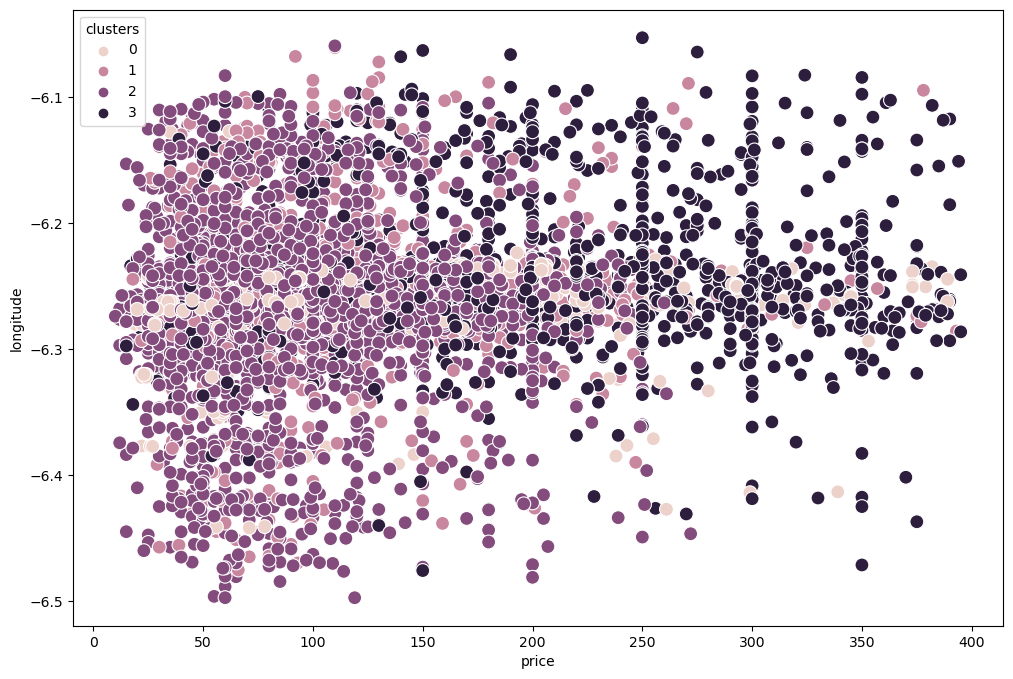

In [51]:
#Plotting the clusters for the "price" and "longitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['price'], y=listings_23['longitude'], hue=listings_23['clusters'], s=100)
ax.grid(False) 
plt.xlabel('price') 
plt.ylabel('longitude') 
plt.show()

In [52]:
#Plotting the clusters for the "calculated_host_listings_count" and "latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['calculated_host_listings_count'], y=listings_23['latitude'], hue=listings_23['clusters'], s=100)
ax.grid(False) 
plt.xlabel('calculated_host_listings_count') 
plt.ylabel('latitude') 
plt.show()

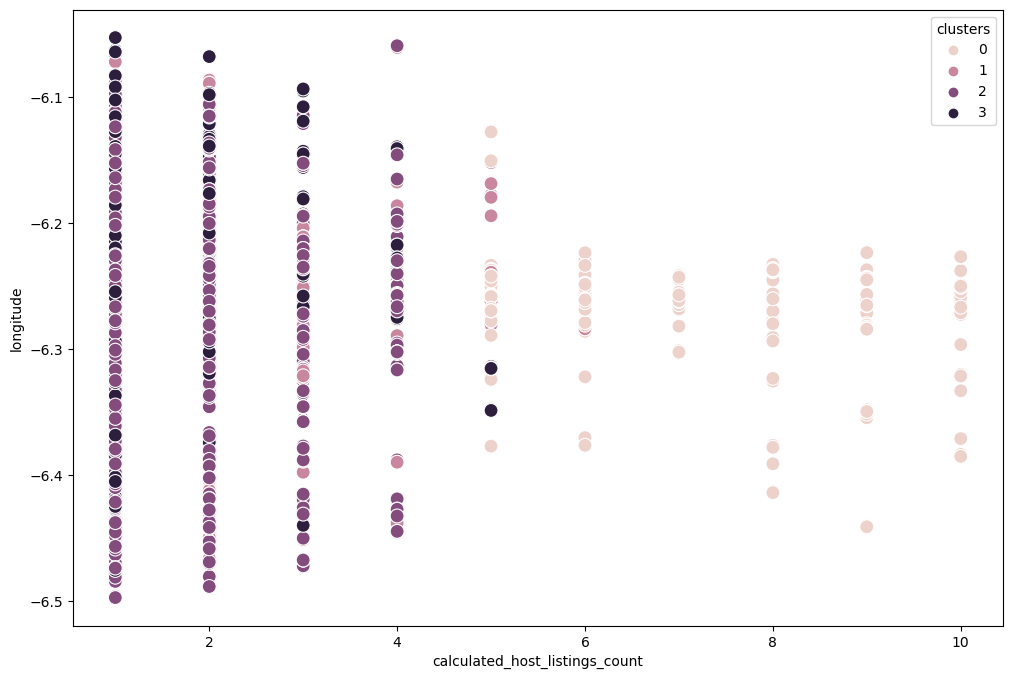

In [53]:
#Plotting the clusters for the "calculated_host_listings_count" and "longitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['calculated_host_listings_count'], y=listings_23['longitude'], hue=listings_23['clusters'], s=100)
ax.grid(False) 
plt.xlabel('calculated_host_listings_count') 
plt.ylabel('longitude') 
plt.show()

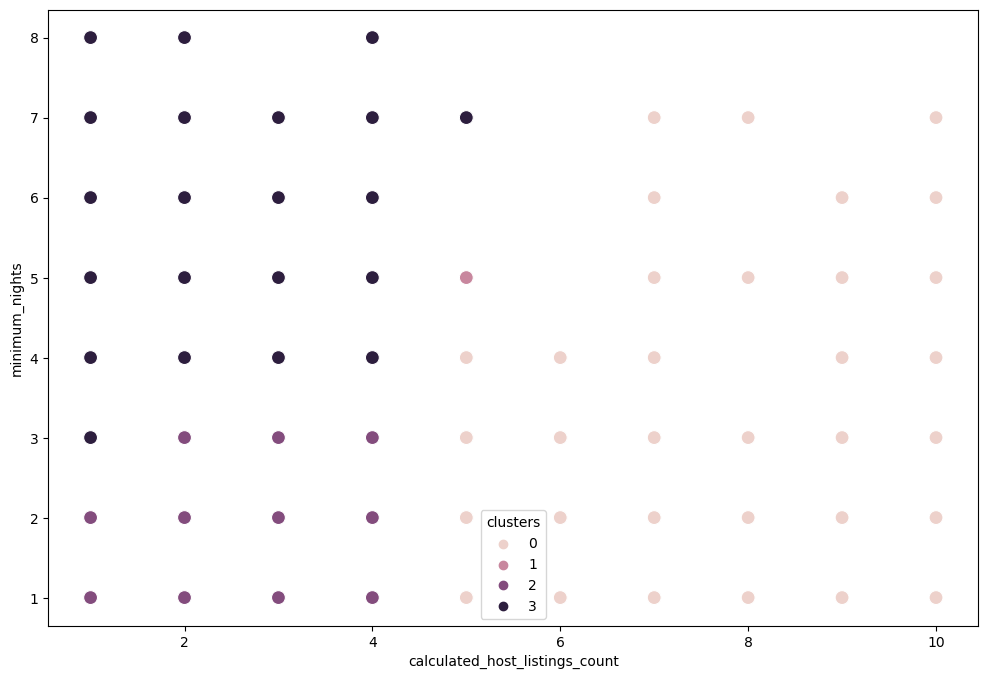

In [54]:
#Plotting the clusters for the "calculated_host_listings_count" and "minimum_nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['calculated_host_listings_count'], y=listings_23['minimum_nights'], hue=listings_23['clusters'], s=100)
ax.grid(False) 
plt.xlabel('calculated_host_listings_count') 
plt.ylabel('minimum_nights') 
plt.show()

In [55]:
#Plotting the clusters for the "longitude" and "minimum_nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['longitude'], y=listings_23['minimum_nights'], hue=listings_23['clusters'], s=100)
ax.grid(False) 
plt.xlabel('longitude') 
plt.ylabel('minimum_nights') 
plt.show()

In [56]:
#Plotting the clusters for the "latitude" and "minimum_nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['latitude'], y=listings_23['minimum_nights'], hue=listings_23['clusters'], s=100)
ax.grid(False) 
plt.xlabel('latitude') 
plt.ylabel('minimum_nights') 
plt.show()

In [57]:
#Plotting the clusters for the "price" and "calculated_host_listings_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['price'], y=listings_23['calculated_host_listings_count'], hue=listings_23['clusters'], s=100)
ax.grid(False) 
plt.xlabel('price') 
plt.ylabel('calculated_host_listings_count') 
plt.show()

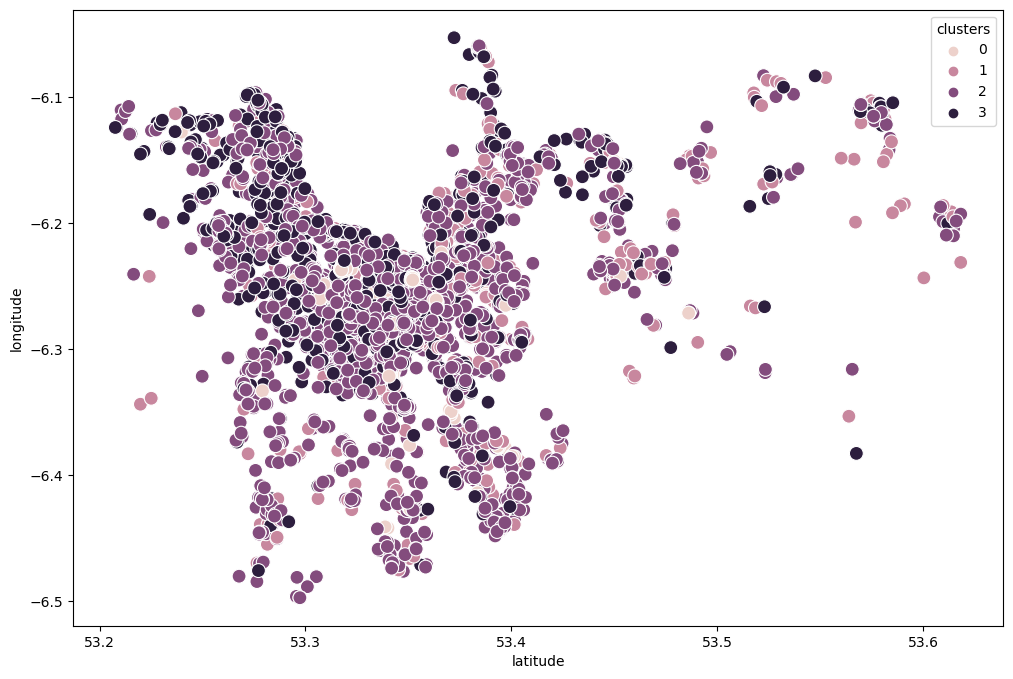

In [58]:
#Plotting the clusters for the "latitude" and "longitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['latitude'], y=listings_23['longitude'], hue=listings_23['clusters'], s=100)
ax.grid(False) 
plt.xlabel('latitude') 
plt.ylabel('longitude') 
plt.show()

In [59]:
#Plotting the clusters for the "number_of_reviews" and "longitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['number_of_reviews'], y=listings_23['longitude'], hue=listings_23['clusters'], s=100)
ax.grid(False) 
plt.xlabel('number_of_reviews') 
plt.ylabel('longitude') 
plt.show()

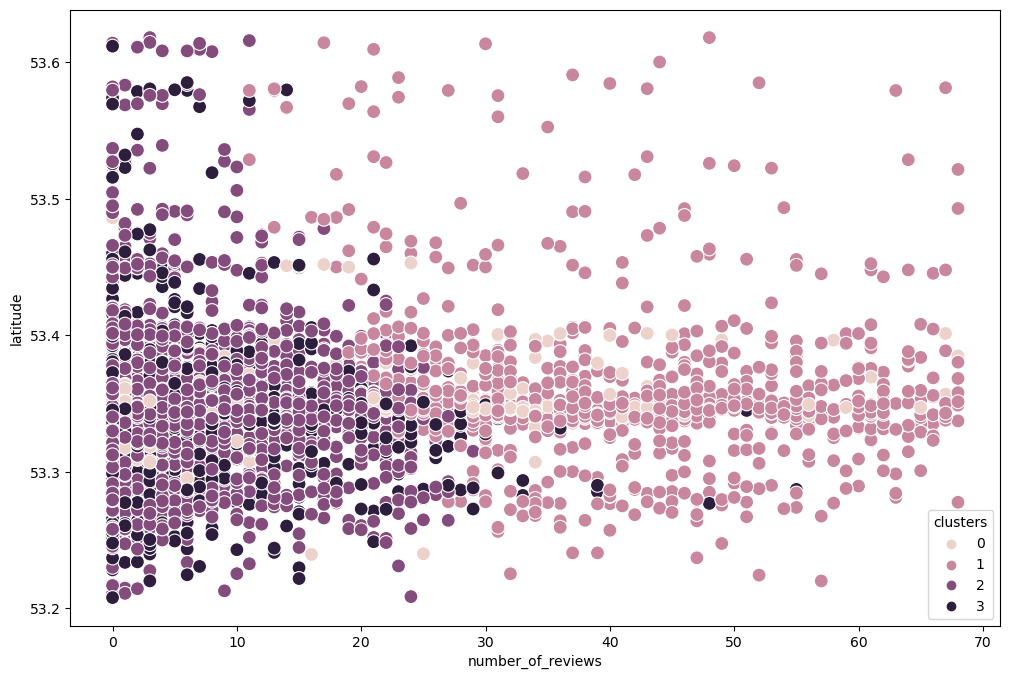

In [60]:
#Plotting the clusters for the "number_of_reviews" and "latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['number_of_reviews'], y=listings_23['latitude'], hue=listings_23['clusters'], s=100)
ax.grid(False) 
plt.xlabel('number_of_reviews') 
plt.ylabel('latitude') 
plt.show()

In [61]:
#Plotting the clusters for the "number_of_reviews" and "minimum_nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['number_of_reviews'], y=listings_23['minimum_nights'], hue=listings_23['clusters'], s=100)
ax.grid(False) 
plt.xlabel('number_of_reviews') 
plt.ylabel('minimum_nights') 
plt.show()

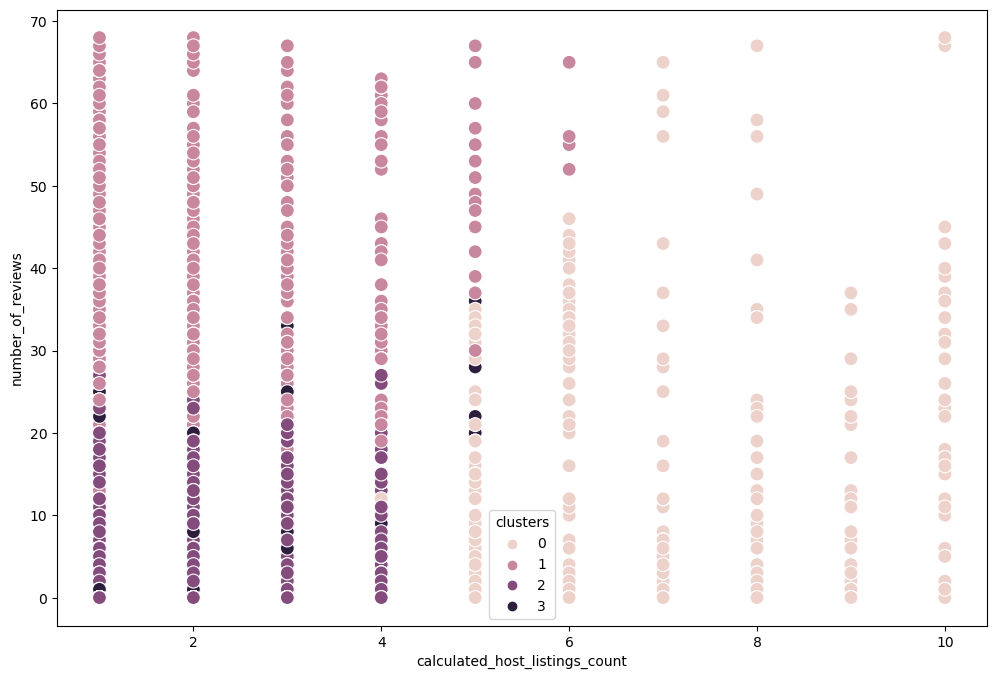

In [62]:
#Plotting the clusters for the "calculated_host_listings_count" and "number_of_reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_23['calculated_host_listings_count'], y=listings_23['number_of_reviews'], hue=listings_23['clusters'], s=100)
ax.grid(False) 
plt.xlabel('calculated_host_listings_count') 
plt.ylabel('number_of_reviews') 
plt.show()

Overall, the clearest clustering occurs between the 'minimum_nights' and 'calculated_host_listings_count' variables. 

Despite this, I would summarise this method of clustering to be ineffective and poorly fitting regarding this particular dataset. 

In [65]:
listings_23.loc[listings_23['clusters'] == 3, 'cluster'] = 'black'
listings_23.loc[listings_23['clusters'] == 2, 'cluster'] = 'dark purple'
listings_23.loc[listings_23['clusters'] == 1, 'cluster'] = 'purple'
listings_23.loc[listings_23['clusters'] == 0, 'cluster'] = 'pink'

In [72]:
listings_24.loc[listings_24['clusters'] == 3, 'cluster'] = 'black'
listings_24.loc[listings_24['clusters'] == 2, 'cluster'] = 'dark purple'
listings_24.loc[listings_24['clusters'] == 1, 'cluster'] = 'purple'
listings_24.loc[listings_24['clusters'] == 0, 'cluster'] = 'pink'

In [66]:
listings_23.groupby('cluster').agg({'price':['mean', 'median'], 
                                 'latitude':['mean', 'median'], 
                                'longitude':['mean', 'median'], 
                            'minimum_nights':['mean', 'median'], 
                         'calculated_host_listings_count':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median']})

price          latitude            longitude            \
                   mean median       mean     median      mean    median   
cluster                                                                    
black        201.651335  200.0  53.338359  53.339271 -6.238320 -6.245710   
dark purple   91.138647   80.0  53.345095  53.342975 -6.267269 -6.263644   
pink         143.013850  123.0  53.349704  53.348207 -6.270508 -6.262290   
purple       119.142349  100.0  53.362637  53.349100 -6.254137 -6.259050   

            minimum_nights        calculated_host_listings_count         \
                      mean median                           mean median   
cluster                                                                   
black             4.010386    4.0                       1.305638    1.0   
dark purple       1.677495    2.0                       1.384461    1.0   
pink              1.947368    1.0                       7.540166    8.0   
purple            1.998814    2.0                       1.692764    1.0   

            number_of_reviews         
                         mean median  
cluster                               
black                5.469585    2.0  
dark purple          5.590422    3.0  
pink                12.373961    6.0  
purple              40.989324   39.0

In [73]:
listings_24.groupby('cluster').agg({'price':['mean', 'median'], 
                                 'latitude':['mean', 'median'], 
                                'longitude':['mean', 'median'], 
                            'minimum_nights':['mean', 'median'], 
                         'calculated_host_listings_count':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median']})

price          latitude            longitude            \
                   mean median       mean     median      mean    median   
cluster                                                                    
black        126.062802  124.0  53.349237  53.348241 -6.260201 -6.261262   
dark purple  128.286872  124.0  53.358149  53.347450 -6.251825 -6.258840   
pink         125.101831  124.0  53.343751  53.342810 -6.259465 -6.258930   
purple       125.638298  124.0  53.338521  53.340075 -6.250177 -6.256135   

            minimum_nights        calculated_host_listings_count         \
                      mean median                           mean median   
cluster                                                                   
black             1.787440    1.0                       7.512077    7.0   
dark purple       1.985413    2.0                       1.515397    1.0   
pink              1.477445    1.0                       1.327825    1.0   
purple            3.753191    3.0                       1.297872    1.0   

            number_of_reviews         
                         mean median  
cluster                               
black                9.000000    3.0  
dark purple         33.270665   32.0  
pink                 4.419830    2.0  
purple               4.653191    2.0

Broadly speaking, these results are not very insightful. This leads me to believe that an alternative method of testing would be beneficial in order to identify potential patterns. 

Perhaps a model that allowed for the inclusion of categorical data would be useful as I suspect that the 'room_type' and 'neighbourhood' variables are influntial with regard to other variables (i.e. a bigger property in desirable area would come with an increased price tag).  